In [45]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

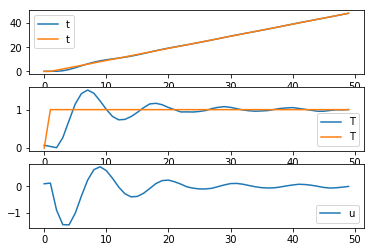

In [71]:
def dynamics(x0 = [.1,.075,0,0],
             period = 1,
             N = 100, 
             alpha = -.5, 
             beta = -.5,
             mu = 0,
             sigma = .1):

  th, Th, tm, Tm = range(4)
  x = np.zeros((N, 4))
  u = np.zeros((N, 1))

  x[0] = x0

  for n in range(N-1):
    # Action
    u[n] = x[n,th] - x[n,tm]

    # Machine dynamics
    x[n+1,tm] = x[n,tm] + x[n,Tm] 
    x[n+1,Tm] = period

    # Human dynamics
    x[n+1,th] = x[n,th] + x[n,Th] + alpha*(u[n] - mu)
    x[n+1,Th] = x[n,Th] + beta * u[n] + np.random.normal(0, sigma)
    
  return x,u


def plt_xu(axs, x, u):
  axs[0].plot(x[:,[0,2]], label='t')
  axs[1].plot(x[:,[1,3]], label='T')
  axs[2].plot(u, label='u')
  for ax in axs:
    ax.legend()
  return fig

N = 50
alpha_sim = -0.5
beta_sim  = -0.3
x_sim, u_sim = dynamics(N=N, period=1, mu=0, alpha=alpha_sim, beta=beta_sim, sigma=.01)
fig, axs = plt.subplots(3)
plt_xu(axs, x_sim, u_sim)
pass

In [54]:
alpha = cvx.Variable()
beta = cvx.Variable()
mu = cvx.Variable()

N = len(x_sim)
x = cvx.Variable((N, 4))
u = np.zeros((N, 1))
th, Th, tm, Tm = range(4)

t = [th, tm]
T = [Th, Tm]

qt, qT = 1, 0

period = 1

constraints = [x[0] == x_sim[0]]

for n in range(N-1):
  # Action
  u[n] = x_sim[n,th] - x_sim[n,tm]
  
  # Machine dynamics
  constraints += [ x[n+1,tm] == x[n,tm] + x[n,Tm] ]
  constraints += [ x[n+1,Tm] == period ]

  # Human dynamics
  constraints += [ x[n+1,th] == x[n,th] + x[n,Th] + alpha*(u[n]) ]
  constraints += [ x[n+1,Th] == x[n,Th] + beta * u[n] ]
    

cost = cvx.sum( qt*cvx.norm(x_sim[:,t] - x[:,t]) + qT*cvx.norm(x_sim[:,T] - x[:,T]) )
prob = cvx.Problem(cvx.Minimize(cost), constraints )
prob.solve(gp=False)


0.7014331265429451

In [67]:
(alpha.value, alpha_sim), (beta.value, beta_sim)

((array(-0.5547609), -0.5), (array(-0.28415213), -0.3))

In [64]:
error = lambda v,s: '%.2f' % ((v-s)/v*100) + "%"
error(alpha.value, alpha_sim), error(beta.value, beta_sim)

('9.87%', '-5.58%')

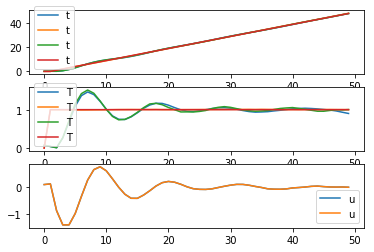

In [74]:
fig, axs = plt.subplots(3)
plt_xu(axs, x.value, u)
plt_xu(axs, x_sim, u)
pass

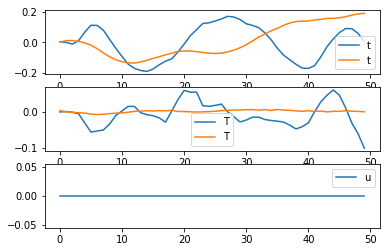

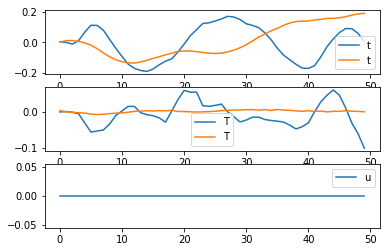

In [76]:
fig, axs = plt.subplots(3)
plt_xu(axs, x.value-x_sim, u-u)

In [ ]:
!git add *cvx-param* && git commit -m "added noise"